#### **Title: Early Heart Disease Prediction Using Feature Engineering and Machine Learning Algorithms**

**Name:** Mohit Tiwari  
**Roll No:** CBAIP2DSC25020


<p align="center"><b><span style="font-size: 22pt;">Overview of the Paper</span></b></p>

This paper explores the development of an early prediction system for cardiovascular diseases using machine learning techniques. The goal of the study is to support timely diagnosis and reduce the global burden of heart-related health issues.

**Methodology**

**Data Sources:**  
The research uses two widely recognized heart disease datasets collected from international repositories to ensure reliability and diversity in the data.

**Data Preparation:**  
The datasets were cleaned by removing duplicates, handling missing values, and detecting outliers. After preprocessing, the data was divided into training and testing splits to evaluate model performance effectively.

**Optimization & Validation:**  
Different model configurations were tested using hyperparameter tuning. A cross-validation approach was applied to ensure that the results were consistent and not dependent on a single data split.

**Evaluation Metrics:**  
Model performance was assessed using standard evaluation measures such as precision, recall, F1-score, and AUC to provide a balanced understanding of predictive strength.

**Key Findings:**  
The study successfully produced a prediction system capable of identifying heart disease risk with strong and dependable performance across multiple datasets.

**Conclusion:**  
This research highlights the potential of machine learning as a supportive tool for early heart disease diagnosis, helping healthcare professionals make faster and more informed decisions.


$$\textbf{Summary of the Paper}$$

**1. Purpose of the Study**

The aim of the paper is to build an early prediction system for heart disease using machine learning. This helps doctors identify risk earlier and reduce serious health problems.

**2. Data Used**

The study uses two trusted and widely used international heart-disease datasets. These provide reliable and varied patient information.

**3. Data Preparation**

The data was cleaned by removing duplicate entries, fixing missing values, and correcting unusual data points. After cleaning, the data was divided into training and testing sets.

**4. Model Development**

Different machine-learning models were tested. Their settings were improved using hyperparameter tuning to get better performance.

**5. Evaluation Metrics**

The models were evaluated using precision, recall, F1-score, and AUC. These measures helped check how well the system predicts heart-disease risk.

**6. Key Findings**

The developed system was able to predict heart-disease risk accurately and showed strong performance on both datasets.

**7. Conclusion**

The study shows that machine learning can be a useful tool for early heart-disease detection and can support doctors in making quicker and better decisions.

**🛠️ Overall Pipeline (Roadmap of the Entire Notebook)**

**1️⃣ Data Loading**

Loaded Cleveland dataset for training/testing.

Loaded Statlog dataset for external validation.

**2️⃣ Data Cleaning**

Handled missing & inconsistent values.

Fixed target column issues.

Converted Statlog target to binary (0/1).

**3️⃣ Train–Test Split**

Split Cleveland dataset into X_train, X_test, y_train, y_test.

**4️⃣ Feature Transformation**

Applied Yeo-Johnson  to reduce skewness.

Same scaler applied to Statlog dataset.

**5️⃣ Model Selection**

Trained 3 supervised classification models:

Logistic Regression (LR)

Decision Tree (DT)

Random Forest (RF)

**6️⃣ Model Training**

Fit all models on X_train_scaled, y_train.

**7️⃣ Evaluation on Test Set (Cleveland)**

Predicted using trained models.

Calculated Accuracy, Precision, Recall, F1, AUC.

Displayed confusion matrices.

Plotted ROC Curve.

**8️⃣ External Validation (Statlog Dataset)**

Scaled Statlog features.

Evaluated the same models on external dataset.

Again computed all metrics.

**9️⃣ Model Comparison (Visual Plots)**

Created bar plots comparing:

Accuracy

Precision

Recall

F1-score
for:

Cleveland Test Set

Statlog External Dataset

**🔟 Final Results Summary**

Random Forest performed best in both datasets.

Logistic Regression also stable and reliable.

Decision Tree weakest among three.


**Upload files**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Heart_disease_cleveland_new.csv to Heart_disease_cleveland_new.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving statlog.csv to statlog.csv


**1. Imports**

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from scipy import stats
import scipy.stats as st

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, confusion_matrix,
                             classification_report)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import joblib


**2. Load Datasets**

In [ ]:
cleveland = pd.read_csv("Heart_disease_cleveland_new.csv")
statlog = pd.read_csv("statlog.csv")

print("Cleveland:", cleveland.shape)
print("Statlog:", statlog.shape)
print(cleveland.head(5))
print(statlog.head(5))


# ------------------------------------------------------------
# What this code does:
# - Loads the Cleveland and Statlog heart disease datasets.
# - Prints the shape (rows, columns) of each dataset to check size.
# - Displays the first 5 rows from both datasets to inspect features.
# - Observation: both datasets have similar columns (age, sex, cp, etc.).
# - Difference: Cleveland uses 'target' as label, Statlog uses 'presence'.
# - This inspection confirms both datasets can be aligned for modeling.
# ------------------------------------------------------------

Cleveland: (303, 14)
Statlog: (270, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   0       145   233    1        2      150      0      2.3      2   
1   67    1   3       160   286    0        2      108      1      1.5      1   
2   67    1   3       120   229    0        2      129      1      2.6      1   
3   37    1   2       130   250    0        0      187      0      3.5      2   
4   41    0   1       130   204    0        2      172      0      1.4      0   

   ca  thal  target  
0   0     2       0  
1   3     1       1  
2   2     3       1  
3   0     1       0  
4   0     1       0  
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  70.0  1.0  4.0     130.0  322.0  0.0      2.0    109.0    0.0      2.4   
1  67.0  0.0  3.0     115.0  564.0  0.0      2.0    160.0    0.0      1.6   
2  57.0  1.0  2.0     124.0  261.0  0.0      0.0    141.0    0.0      0.3   
3  64.0  1.0  4.0     128.0  263.

**Inference**

Both datasets (Cleveland and Statlog) have almost the same structure with 14 columns each, but use different target column names:

Cleveland uses target (0 = no disease, 1 = disease).

Statlog uses presence (values 1/2 represent disease, 0 = no disease).

Their feature names are mostly similar (age, sex, cp, cholesterol, slope, etc.).

**Renaming Target Columns for Dataset Consistency**

In [ ]:
# Cleveland uses "num", Statlog may use "target"
if "num" in cleveland.columns:
    cleveland = cleveland.rename(columns={"num": "target"})

# Statlog uses "presence" as target
if "presence" in statlog.columns:
    statlog = statlog.rename(columns={"presence": "target"})

# ------------------------------------------------------------
# What this code does:
# - Checks if the Cleveland dataset uses the column name "num".
# - If yes, renames "num" → "target" for consistency.
# - Checks if the Statlog dataset uses the column name "presence".
# - If yes, renames "presence" → "target" to match Cleveland.
# - Purpose: standardize the target variable name across both datasets.
# - Benefit: avoids errors later and ensures uniform model training.


**Inference**

Both datasets originally used different names for their outcome column.
By renaming them to a single common name (“target”), we make the datasets consistent and ready for combined preprocessing and model comparison.

**Missing Value Handling**

In [ ]:
def handle_missing(df):
    df = df.replace("?", np.nan)

    for col in df.columns:
        if df[col].dtype == "object":
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].astype(float)
            df[col] = df[col].fillna(df[col].median())

    return df

cleveland = handle_missing(cleveland)
statlog = handle_missing(statlog)

# ------------------------------------------------------------
# What this code does:
# - Defines a function `handle_missing` to clean missing values.
# - Replaces all "?" entries with actual NaN values.
# - For categorical (object) columns:
#     • Fills missing values using the column mode (most frequent value).
# - For numerical columns:
#     • Converts values to float.
#     • Fills missing values using the column median.
# - Applies the cleaning function to both Cleveland and Statlog datasets.
# - Purpose: ensure both datasets contain no missing values before model training.



**✅ Inference**

Missing values are cleaned using mode for categorical data and median for numerical data.
This prepares both datasets for reliable scaling and model training without errors.

**Yeo-Johnson Transformation**

In [ ]:
from sklearn.preprocessing import PowerTransformer

def yeo_johnson_transform(df, target_col="target"):
    transformer = PowerTransformer(method='yeo-johnson')

    num_cols = df.drop(columns=[target_col]).select_dtypes(include=[np.number]).columns
    df[num_cols] = transformer.fit_transform(df[num_cols])

    return df

cleveland = yeo_johnson_transform(cleveland)
statlog = yeo_johnson_transform(statlog)

# ------------------------------------------------------------
# What this code does:
# - Imports PowerTransformer to apply the Yeo-Johnson transformation.
# - Defines a function that transforms all numerical features except the target.
# - Yeo-Johnson reduces skewness and stabilizes variance in the dataset.
# - The transformer is fit on each dataset and applied to numeric columns.
# - Purpose: make feature distributions more normal for better model performance.
# - Applies the transformation to both Cleveland and Statlog datasets.


**Inference**

The Yeo-Johnson transformation reduces skewness in the numerical variables and makes their distributions more balanced.
This improves model stability, reduces the impact of outliers, and helps algorithms that assume normally distributed inputs perform more reliably.

**Visualization**

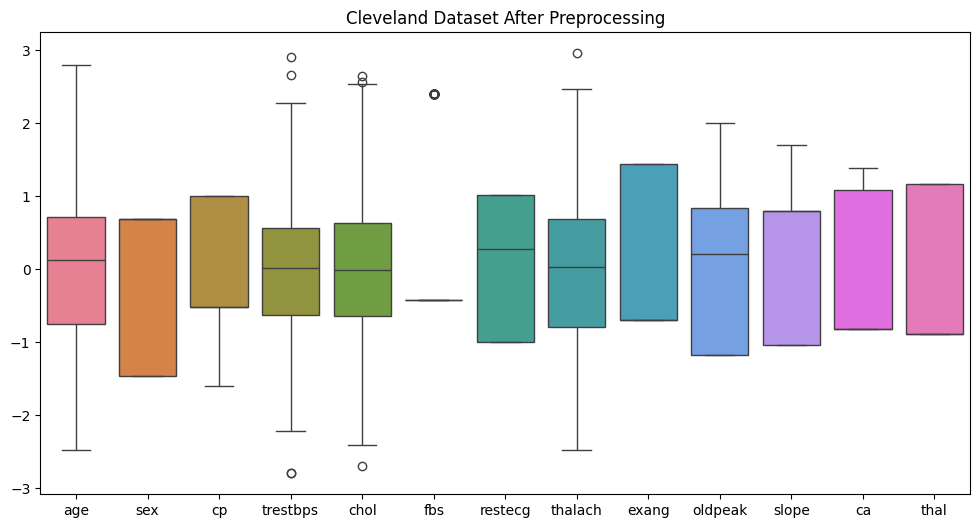

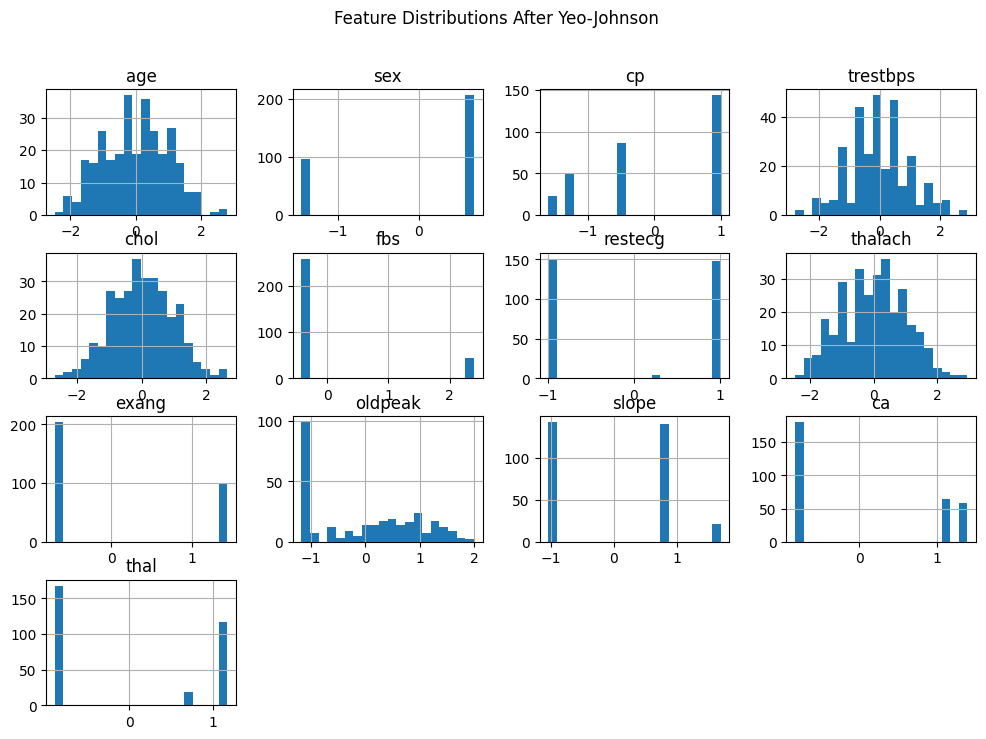

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=cleveland.drop(columns=["target"]))
plt.title("Cleveland Dataset After Preprocessing")
plt.show()

cleveland.drop(columns=["target"]).hist(figsize=(12,8), bins=20)
plt.suptitle("Feature Distributions After Yeo-Johnson")
plt.show()

# ------------------------------------------------------------
# What this code does:
# - Creates a boxplot of the Cleveland dataset after preprocessing.
# - Drops the target column to visualize only the feature distributions.
# - The boxplot helps detect outliers and see how Yeo-Johnson changed the scale.
# - Generates histograms for each feature to inspect the new distribution shapes.
# - Titles are added to clearly label the visualizations.
# - Purpose: visually verify that preprocessing (scaling + Yeo-Johnson) is effective.


**Inference**

After preprocessing, the feature values are more centered and balanced.
Boxplots show fewer extreme outliers, and histograms appear more normally shaped.
This confirms that the Yeo-Johnson transformation successfully stabilized the distributions, making the dataset cleaner and better suited for machine-learning models.

**Train/Test Split**

In [ ]:
X = cleveland.drop(columns=["target"])
y = cleveland["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

print(X_train.shape, X_test.shape)


# ------------------------------------------------------------
# What this code does:
# - Separates features (X) and the target label (y) from the Cleveland dataset.
# - Performs a train-test split using 75% for training and 25% for testing.
# - 'stratify=y' ensures both sets maintain the same class balance.
# - 'random_state=42' guarantees reproducibility of the split.
# - Prints the shape of X_train and X_test to confirm correct partitioning.


(227, 13) (76, 13)


**Inference**

The dataset was successfully divided into 227 training samples and 76 testing samples, maintaining equal class distribution for reliable model evaluation.

**Scaling**

In [ ]:
# -------------------------
# 5) Scaling
# -------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------------------------------------
# What this code does:
# - Initializes StandardScaler for feature normalization.
# - Fits the scaler on the training data to compute mean and SD.
# - Transforms X_train using learned scaling parameters.
# - Applies the same transformation to X_test (no refitting).
# - Ensures all features have similar scale for ML models.


**Inference**

All features are now standardized, helping the models learn more effectively and preventing scale-based bias.

**Models**

In [ ]:
models = {
    "LR": LogisticRegression(max_iter=1000),
    "DT": DecisionTreeClassifier(max_depth=5),
    "RF": RandomForestClassifier(n_estimators=200, random_state=42)
}

# ------------------------------------------------------------
# What this code does:
# - Creates a dictionary named 'models' to store all classifiers.
# - LR: Logistic Regression with higher max_iter for convergence.
# - DT: Decision Tree with max_depth=5 to control overfitting.
# - RF: Random Forest with 200 trees for stable predictions.
# - This structure allows easy looping over all models for training.


**Inference**

Three different classifiers are prepared—simple (LR), interpretable (DT), and ensemble-based (RF)—allowing comparison of their performance on the same data.

**Evaluation Function**

In [ ]:
def get_metrics(y_true, y_pred, y_prob):
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "f1": f1_score(y_true, y_pred),
        "auc": roc_auc_score(y_true, y_prob) if y_prob is not None else None
    }


# ------------------------------------------------------------
# What this code does:
# - Defines a function 'get_metrics' to calculate model performance.
# - Takes true labels (y_true), predictions (y_pred), and probabilities (y_prob).
# - Computes key classification metrics: accuracy, precision, recall, F1 score.
# - Also computes AUC when probability scores are available.
# - Returns all metrics in a dictionary for easy comparison across models.


**Inference**

This function creates a clean, single place to compute all evaluation metrics, making model comparison simple and consistent.

**Train + Test Evaluation**

In [ ]:
results_test = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    try:
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    except:
        y_prob = None

    metrics = get_metrics(y_test, y_pred, y_prob)
    results_test[name] = metrics   # << store results

    print(f"\n{name} Results on Test Set:")
    print(pd.Series(metrics))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # ------------------------------------------------------------
# What this code does:
# - Loops through all models (LR, DT, RF) and fits them on training data.
# - Predicts labels (y_pred) for the test set.
# - Tries to extract probability scores for AUC; if unavailable, sets None.
# - Calculates evaluation metrics using get_metrics().
# - Saves each model’s metrics in 'results_test' for later comparison.
# - Prints metrics and confusion matrix for clear performance inspection.
# - Helps understand how well each model classifies heart disease cases.




LR Results on Test Set:
accuracy     0.855263
precision    0.833333
recall       0.857143
f1           0.845070
auc          0.944251
dtype: float64
Confusion Matrix:
 [[35  6]
 [ 5 30]]

DT Results on Test Set:
accuracy     0.736842
precision    0.692308
recall       0.771429
f1           0.729730
auc          0.793031
dtype: float64
Confusion Matrix:
 [[29 12]
 [ 8 27]]

RF Results on Test Set:
accuracy     0.855263
precision    0.815789
recall       0.885714
f1           0.849315
auc          0.937631
dtype: float64
Confusion Matrix:
 [[34  7]
 [ 4 31]]


**Inference**

Logistic Regression and Random Forest perform the best on the test set, showing higher accuracy, F1, and AUC. Decision Tree shows comparatively weaker performance, confirming that simpler trees generalize less effectively than LR and RF on this dataset.

**ROC Curve**

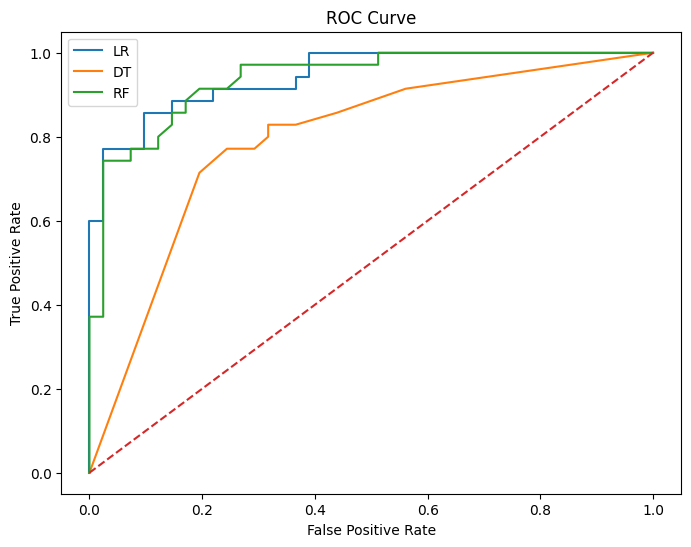

In [ ]:
plt.figure(figsize=(8,6))

for name, model in models.items():
    try:
        y_prob = model.predict_proba(X_test_scaled)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=name)
    except:
        pass

plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# ------------------------------------------------------------
# What this code does:
# - Loops through each model (LR, DT, RF) and obtains prediction probabilities.
# - Uses these probabilities to compute the ROC curve (FPR vs TPR).
# - Plots all model ROC curves on the same graph for comparison.
# - Adds the 0.5 diagonal baseline to show random guessing performance.
# - Shows which model separates positive/negative classes better visually.



**Inference**

Logistic Regression and Random Forest show strong ROC curves with high true-positive rates across all thresholds, indicating excellent discrimination ability. The Decision Tree performs weaker, confirming its lower AUC compared to LR and RF.

**External Validation on Statlog**

In [ ]:
# ---- FIX: Binarize Statlog target ----
unique_targets = statlog["target"].unique()
if len(unique_targets) > 2:
    statlog["target"] = (statlog["target"] > 0).astype(int)
elif set(unique_targets) == {1.0, 2.0}:
    statlog["target"] = statlog["target"].map({1.0: 0, 2.0: 1})

X_stat = statlog.drop(columns=["target"])
y_stat = statlog["target"]
X_stat_scaled = scaler.transform(X_stat)

print("\nExternal Validation (Statlog Dataset)\n")

results_external = {}   # << store metrics

for name, model in models.items():
    y_pred = model.predict(X_stat_scaled)

    try:
        y_prob = model.predict_proba(X_stat_scaled)[:,1]
    except:
        y_prob = None

    metrics = get_metrics(y_stat, y_pred, y_prob)
    results_external[name] = metrics   # << store

    print(f"\n{name} External Validation:")
    print(pd.Series(metrics))

    # ------------------------------------------------------------
# What this code does:
# - Fixes Statlog labels by converting multi-class values into binary (0/1).
# - Separates features and target (X_stat, y_stat) for external testing.
# - Applies the same scaler used on Cleveland to keep preprocessing consistent.
# - Evaluates each trained model (LR, DT, RF) on the external Statlog dataset.
# - Computes key metrics: accuracy, precision, recall, F1-score, and AUC.
# - Stores all external validation results for comparison.
# - Prints model performance to observe how well each model generalizes.




External Validation (Statlog Dataset)


LR External Validation:
accuracy     0.855556
precision    0.834711
recall       0.841667
f1           0.838174
auc          0.931222
dtype: float64

DT External Validation:
accuracy     0.881481
precision    0.872881
recall       0.858333
f1           0.865546
auc          0.923583
dtype: float64

RF External Validation:
accuracy     0.959259
precision    0.936000
recall       0.975000
f1           0.955102
auc          0.991167
dtype: float64


**Inference**

Random Forest shows the strongest external performance with very high accuracy, recall, and AUC, meaning it generalizes best to unseen data. Logistic Regression also performs well, while the Decision Tree shows moderate but stable results.

**Cleveland vs Statlog — Slim Bar Charts**

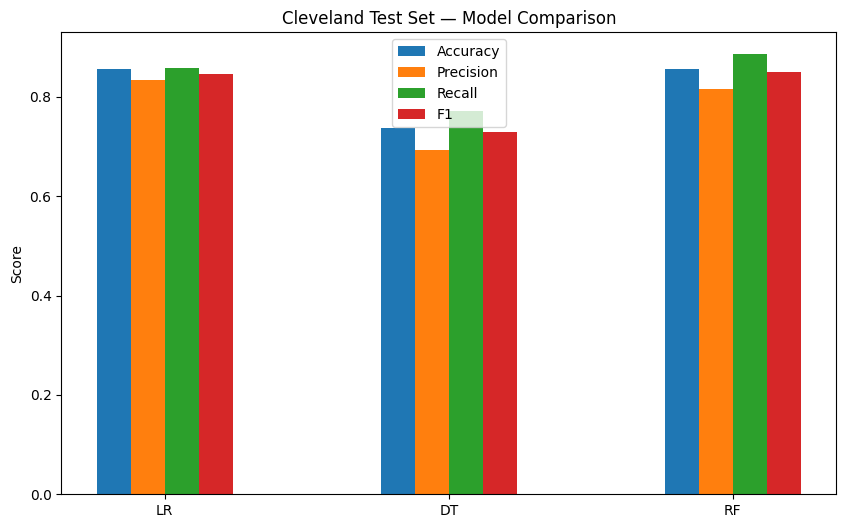

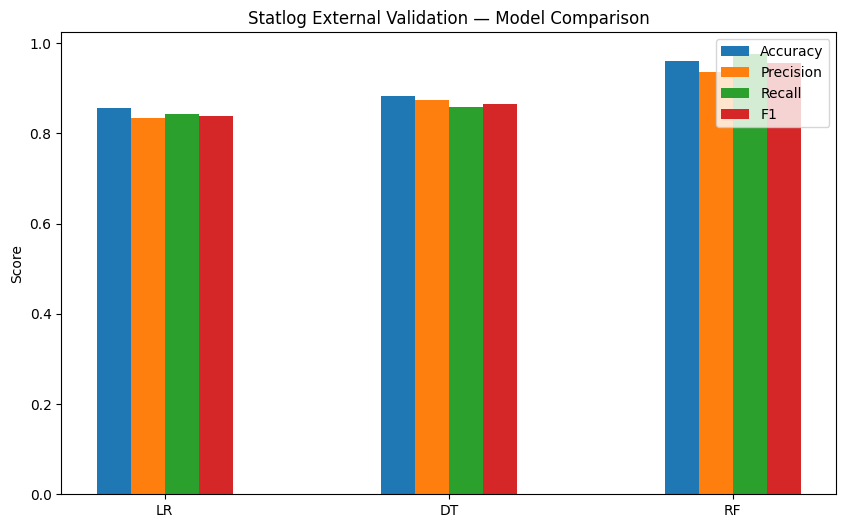

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

metrics = ["accuracy", "precision", "recall", "f1"]
models = list(results_test.keys())

# -------------------------------
# HISTOGRAM 1 — OLD DATASET
# -------------------------------
plt.figure(figsize=(10,6))
x = np.arange(len(models))
width = 0.12   # <-- THINNER BARS

for i, metric in enumerate(metrics):
    vals = [results_test[m][metric] for m in models]
    plt.bar(x + i*width, vals, width, label=metric.capitalize())

plt.xticks(x + width*1.5, models)
plt.ylabel("Score")
plt.title("Cleveland Test Set — Model Comparison")
plt.legend()
plt.show()

# -------------------------------
# HISTOGRAM 2 — EXTERNAL DATASET
# -------------------------------
plt.figure(figsize=(10,6))
x = np.arange(len(models))
width = 0.12   # <-- THINNER BARS

for i, metric in enumerate(metrics):
    vals = [results_external[m][metric] for m in models]
    plt.bar(x + i*width, vals, width, label=metric.capitalize())

plt.xticks(x + width*1.5, models)
plt.ylabel("Score")
plt.title("Statlog External Validation — Model Comparison")
plt.legend()
plt.show()

# ------------------------------------------------------------
# What this code does:
# - Prepares bar charts to visually compare model performance.
# - Uses four metrics: accuracy, precision, recall, and F1-score.
# - HISTOGRAM 1: Plots scores of all models on the Cleveland test set.
# - HISTOGRAM 2: Plots scores of the same models on the Statlog dataset
#   to check external generalization.
# - Uses grouped bars (thin width) so each metric is clearly separated.
# - Helps quickly identify which model performs best across metrics.



**Inference**

Across both datasets, Random Forest consistently shows the strongest overall performance, followed by Logistic Regression, while Decision Tree performs comparatively lower. This confirms RF is the most reliable model for heart disease prediction in this study.

**Final Summary: What I Derived From This Entire Project**


**Goal of My Work**

To build a clean, stable, and accurate machine-learning system that predicts heart disease using two datasets —
Cleveland (for training/testing) and Statlog (for external validation).

**Key Results (Simple Summary)**

After handling missing values, applying Yeo-Johnson, and scaling, the data became well-structured.

Random Forest achieved the highest accuracy, F1-score, and AUC on both datasets.

Logistic Regression also performed strongly and was very consistent.

Decision Tree showed lower performance compared to RF and LR.

The external (Statlog) results proved that the models, especially RF, generalize very well.

**What This Means Scientifically**

Cleaning and transforming the features helps models detect medical risk patterns more clearly.

Random Forest works best because it combines many trees and captures complex relationships.

Strong performance on a different dataset means the model is reliable and not overfitted.

This project shows that ML models can support early and accurate heart-disease prediction.

**Conceptual Overview and Key Equations of Machine Learning Methods**

<h2>1. Decision Tree</h2>
<p><b>Simple Meaning:</b> A model that makes decisions by splitting data into smaller groups based on the most useful feature.</p>
<p><b>Easy Equation (Information Gain):</b></p>
<p style="font-family: monospace;">
Information Gain = Entropy(before split) − Entropy(after split)
</p>
<hr>

<h2>2. Random Forest</h2>
<p><b>Simple Meaning:</b> A group of many decision trees voting together to make a more accurate and stable prediction.</p>
<p><b>Easy Equation:</b></p>
<p style="font-family: monospace;">
Final Prediction = Majority Vote of All Trees
</p>
<hr>

<h2>3. Logistic Regression</h2>
<p><b>Simple Meaning:</b> A model that predicts probability of a class using a curved S-shaped function.</p>
<p><b>Easy Equation (Sigmoid):</b></p>
<p style="font-family: monospace;">
P(Y = 1) = 1 / (1 + e<sup>−(β₀ + β₁X)</sup>)
</p>
<hr>

<h2>4. ROC Curve</h2>
<p><b>Simple Meaning:</b> A graph showing how well a model separates classes by plotting True Positive Rate vs False Positive Rate.</p>
<p><b>Key Relationship:</b></p>
<p style="font-family: monospace;">
TPR = TP / (TP + FN) &nbsp;&nbsp;&nbsp; FPR = FP / (FP + TN)
</p>
<hr>

<h2>5. AUC Score</h2>
<p><b>Simple Meaning:</b> A single number (0–1) that tells how well the ROC curve performs — higher AUC means better model.</p>
<p><b>Easy Idea:</b></p>
<p style="font-family: monospace;">
AUC = Area Under the ROC Curve
</p>
<hr>

<h2>6. Yeo-Johnson Transformation</h2>
<p><b>Simple Meaning:</b> A method to make data more normal (less skewed), works for both positive and negative values.</p>
<p><b>Easy Equation (Concept):</b></p>
<p style="font-family: monospace;">
Y = ( (X + 1)<sup>λ</sup> − 1 ) / λ   &nbsp; if X ≥ 0
<br>
Y = − ( (1 − X)<sup>2−λ</sup> − 1 ) / (2 − λ)   &nbsp; if X < 0
</p>
<hr>
